# Packages laden

In [1]:
import tensorflow as tf
import os
import tensorflow_datasets as tfds
import zipfile
import shutil
import matplotlib.pyplot as plt
import numpy
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras import Input
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import InputLayer, Dense, BatchNormalization

# Mounting und Data Loading



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Arbeitsverzeichnis wechseln

In [3]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Introduction Course')

Daten einlesen

In [32]:
import pandas as pd

data_path = "./csv_data"

training_features = pd.read_csv(f'{data_path}/training_features.csv')
training_labels = pd.read_csv(f'{data_path}/training_labels.csv')
validation_features = pd.read_csv(f'{data_path}/validation_features.csv')
validation_labels = pd.read_csv(f'{data_path}/validation_labels.csv')
test_features = pd.read_csv(f'{data_path}/test_features.csv')
validation_data = pd.read_csv(f'{data_path}/validation_data.csv')

In [33]:
print('Training-Set: ', training_features.shape)
print('Test-Set: ', training_labels.shape)
print('Validation-Features: ', validation_features.shape)
print('Validation-Labels: ', validation_labels.shape)
print('Test-Features: ', test_features.shape)
print('Validation-Data: ', validation_data.shape)

Training-Set:  (7467, 22)
Test-Set:  (7467, 1)
Validation-Features:  (1867, 22)
Validation-Labels:  (1867, 1)
Test-Features:  (1830, 23)
Validation-Data:  (1867, 23)


In [34]:
validation_data.head()

,label,(Intercept),wochentagDonnerstag,wochentagFreitag,wochentagMittwoch,wochentagMontag,wochentagSamstag,wochentagSonntag,jahreszeitHerbst,jahreszeitSommer,...,Temperaturmoderat,Temperatursommerlich,as.factor(Warengruppe)2,as.factor(Warengruppe)3,as.factor(Warengruppe)4,as.factor(Warengruppe)5,as.factor(Warengruppe)6,KielerWocheTRUE,FeiertagTRUE,FerienTRUE
0,280.921451,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
1,239.066941,1,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,582.549770,1,1,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
3,264.347743,1,1,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
4,111.906264,1,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1


# Modell bauen

In [9]:
# Grundgerüst Sequentialmodell
model = models.Sequential()
#Input Layer
model.add(InputLayer(input_shape=(training_features.shape[1],), name='Input'))
model.add(BatchNormalization( name = 'Normalization'))
model.add(Dense(10, activation='relu', name='Hidden1'))
model.add(Dense(4, activation='relu', name='Hidden2'))
#Output Layer
model.add(Dense(1, name='Output'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Normalization (BatchNormal  (None, 22)                88        
 ization)                                                        
                                                                 
 Hidden1 (Dense)             (None, 10)                230       
                                                                 
 Hidden2 (Dense)             (None, 4)                 44        
                                                                 
 Output (Dense)              (None, 1)                 5         
                                                                 
Total params: 367 (1.43 KB)
Trainable params: 323 (1.26 KB)
Non-trainable params: 44 (176.00 Byte)
_________________________________________________________________


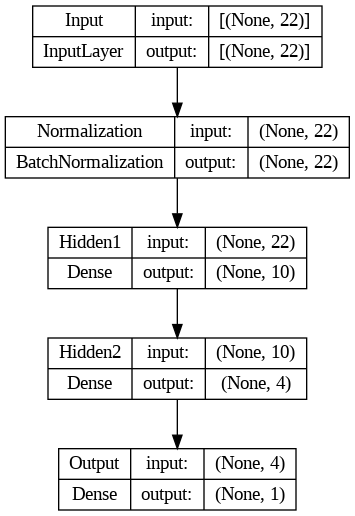

In [10]:
# Model als Bild dargestellt
plot_model(model, to_file='CNN_model.png', show_shapes=True, show_layer_names=True)

In [11]:
# Model bauen
model.compile(loss='mse',
              optimizer=Adam(learning_rate=1e-4))

In [12]:
# Verlauf in history gespeichert
epochs=200
history = model.fit(
  training_features,
  training_labels,
  validation_data=(validation_features, validation_labels),
  epochs=epochs
)

Epoch 1/200
234/234 [==============================] - 1s 2ms/step - loss: 65088.3984 - val_loss: 55684.1797
Epoch 2/200
234/234 [==============================] - 1s 2ms/step - loss: 64844.3320 - val_loss: 55346.8086
Epoch 3/200
234/234 [==============================] - 1s 2ms/step - loss: 64503.3164 - val_loss: 54942.2773
Epoch 4/200
234/234 [==============================] - 1s 3ms/step - loss: 64013.2734 - val_loss: 54416.5195
Epoch 5/200
234/234 [==============================] - 0s 2ms/step - loss: 63341.0117 - val_loss: 53669.4609
Epoch 6/200
234/234 [==============================] - 0s 2ms/step - loss: 62418.8711 - val_loss: 52677.1797
Epoch 7/200
234/234 [==============================] - 0s 2ms/step - loss: 61186.4336 - val_loss: 51364.5078
Epoch 8/200
234/234 [==============================] - 0s 2ms/step - loss: 59564.6641 - val_loss: 49665.3164
Epoch 9/200
234/234 [==============================] - 0s 2ms/step - loss: 57499.0117 - val_loss: 47516.5820
Epoch 10/200
234/23

In [ ]:
model.save('python_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
# Accuracy und Loss Werte abspeichern
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = history.epoch

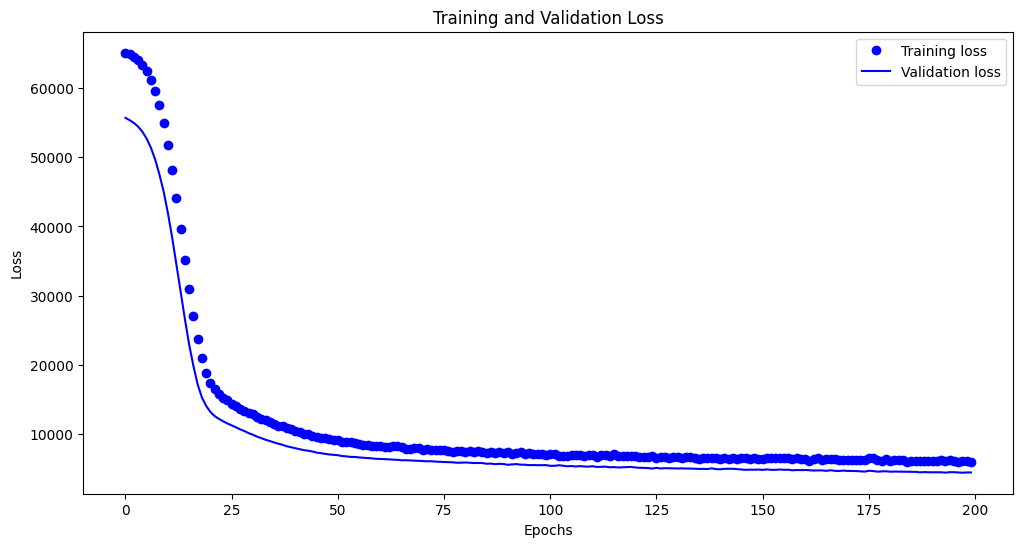

In [14]:
# Accuracy Verläufe zeichnen
plt.figure(figsize=(12,6))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

MAPE auf Validierungsdaten gesamt

In [19]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")

59/59 [==============================] - 0s 2ms/step
MAPE on the Validation Data: 31.07%
      prediction      actual
0     333.949127  280.921451
1     196.120895  239.066941
2     477.068451  582.549770
3     214.012375  264.347743
4     115.565437  111.906264
...          ...         ...
1862   52.494972  123.075682
1863  228.542542  586.081666
1864   52.553635  285.872616
1865   32.770916   57.102795
1866  107.682968  261.341313

[1867 rows x 2 columns]


      prediction      actual
0     333.949127  280.921451
1     196.120895  239.066941
2     477.068451  582.549770
3     214.012375  264.347743
4     115.565437  111.906264
...          ...         ...
1862   52.494972  123.075682
1863  228.542542  586.081666
1864   52.553635  285.872616
1865   32.770916   57.102795
1866  107.682968  261.341313

[1867 rows x 2 columns]


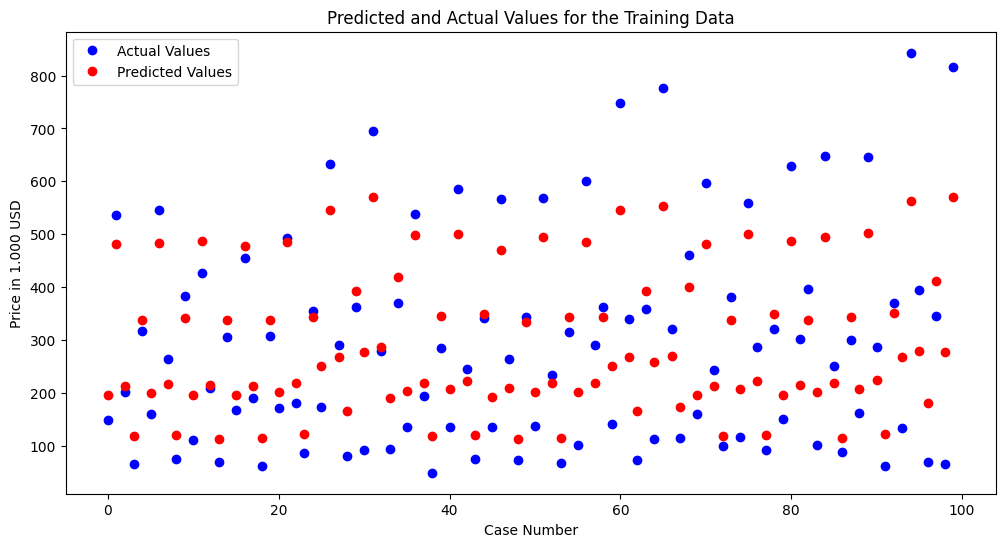

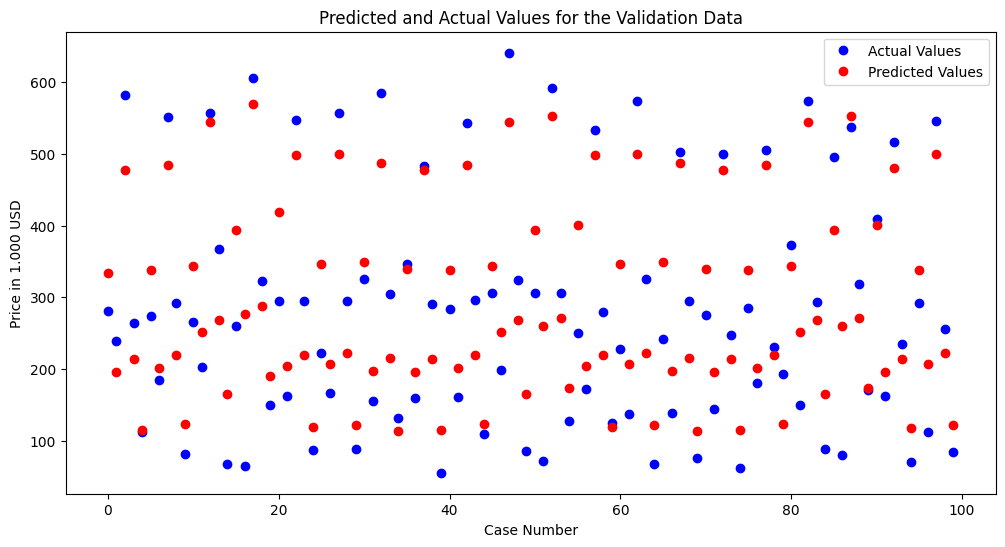

In [24]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], 'bo', label='Actual Values')
    plt.plot(data['prediction'], 'ro', label='Predicted Values')
    plt.title(title)
    plt.xlabel('Case Number')
    plt.ylabel('Price in 1.000 USD')
    plt.legend()
    plt.show()

data_train = pd.DataFrame({'prediction': training_predictions.flatten(), 'actual': np.array(training_labels).flatten()})
data_validation = pd.DataFrame({'prediction': validation_predictions.flatten(), 'actual': np.array(validation_labels).flatten()})
print(data_validation)
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')

# Aufteilen nach Warengruppe

Warengruppe 1

In [45]:
validation_data_w1 = validation_data[(validation_features['as.factor(Warengruppe)2'] == 0) & (validation_features['as.factor(Warengruppe)3'] == 0) & (validation_features['as.factor(Warengruppe)4'] == 0) & (validation_features['as.factor(Warengruppe)5'] == 0) & (validation_features['as.factor(Warengruppe)6']==0)]
validation_labels_w1 = validation_data_w1['label']
validation_features_w1 = validation_data_w1.drop(columns = ['label'])

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

validation_predictions = model.predict(validation_features_w1)
print(f"MAPE on the Validation Data: {mape(validation_labels_w1, validation_predictions):.2f}%")

12/12 [==============================] - 0s 1ms/step
MAPE on the Validation Data: 47.98%


Warengruppe 2

In [46]:
validation_data_w2 = validation_data[(validation_features['as.factor(Warengruppe)2'] == 1)]
validation_labels_w2 = validation_data_w2['label']
validation_features_w2 = validation_data_w2.drop(columns = ['label'])

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

validation_predictions = model.predict(validation_features_w2)
print(f"MAPE on the Validation Data: {mape(validation_labels_w2, validation_predictions):.2f}%")

12/12 [==============================] - 0s 1ms/step
MAPE on the Validation Data: 40.01%


Warengruppe 3

In [47]:
validation_data_w3 = validation_data[(validation_features['as.factor(Warengruppe)3'] == 1)]
validation_labels_w3 = validation_data_w3['label']
validation_features_w3 = validation_data_w3.drop(columns = ['label'])

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

validation_predictions = model.predict(validation_features_w3)
print(f"MAPE on the Validation Data: {mape(validation_labels_w3, validation_predictions):.2f}%")

12/12 [==============================] - 0s 1ms/step
MAPE on the Validation Data: 49.70%


Warengruppe 4

In [48]:
validation_data_w4 = validation_data[(validation_features['as.factor(Warengruppe)4'] == 1)]
validation_labels_w4 = validation_data_w4['label']
validation_features_w4 = validation_data_w4.drop(columns = ['label'])

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

validation_predictions = model.predict(validation_features_w4)
print(f"MAPE on the Validation Data: {mape(validation_labels_w4, validation_predictions):.2f}%")

12/12 [==============================] - 0s 1ms/step
MAPE on the Validation Data: 41.36%


Warengruppe 5

In [49]:
validation_data_w5 = validation_data[(validation_features['as.factor(Warengruppe)5'] == 1)]
validation_labels_w5 = validation_data_w5['label']
validation_features_w5 = validation_data_w5.drop(columns = ['label'])

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

validation_predictions = model.predict(validation_features_w5)
print(f"MAPE on the Validation Data: {mape(validation_labels_w5, validation_predictions):.2f}%")

12/12 [==============================] - 0s 2ms/step
MAPE on the Validation Data: 28.71%


Warengruppe 6

In [50]:
validation_data_w6 = validation_data[(validation_features['as.factor(Warengruppe)6'] == 1)]
validation_labels_w6 = validation_data_w6['label']
validation_features_w6 = validation_data_w6.drop(columns = ['label'])

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

validation_predictions = model.predict(validation_features_w6)
print(f"MAPE on the Validation Data: {mape(validation_labels_w6, validation_predictions):.2f}%")

2/2 [==============================] - 0s 3ms/step
MAPE on the Validation Data: 63.77%


# Kaggel Vorbereitung

In [25]:
# Extract IDs and prepare test features
test_ids = test_features['id']
test_features_for_prediction = test_features.drop(columns=['id'])

# Make predictions
test_predictions = model.predict(test_features_for_prediction)

# Create a DataFrame for submission
predictions_df = pd.DataFrame({
    'id': test_ids,
    'Predicted_Value': test_predictions.flatten() # Replace column name with name given in the smaple_submission.csv
})

# Export to CSV
predictions_df.to_csv('kaggle_submission.csv', index=False)

print("Submission file created: 'kaggle_submission.csv'")

58/58 [==============================] - 0s 1ms/step
Submission file created: 'kaggle_submission.csv'
